
#  Inferential Statistics

## PETE 2061 Lab 8 Workbook 

## THIS IS DUE BY 11:59 PM TODAY (Mar 13, 2020)

1. ** Using the example in "lab8_inferential_stats.ipynb", write a Python code to compute the confidence interval for the winning percentage of Ed Orgeron based on "poll-larger.csv", and show that he is the likely winner within a 95% confidence interval**
2. Type out:
    * (a) the 95% confidence interval
    * (b) the point estimate
    * (c) the margin of error.

In [87]:
import math
import io
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats
import scipy.optimize
import scipy.spatial

In [95]:
def sample(orgeronWinPercent,n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < orgeronWinPercent,'Saban','Orgeron')})

s = sample(0.489,n=1000)
s['vote'].value_counts(normalize=False)

Orgeron    517
Saban      483
Name: vote, dtype: int64

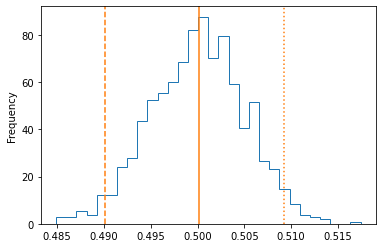

In [96]:
distDF['Orgeron'].plot(kind='hist',histtype='step',bins=30, density=True)
plt.axvline(distDF['Orgeron'].quantile(0.025), c='C1',linestyle='--')
plt.axvline(distDF['Orgeron'].quantile(0.500), c='C1')
plt.axvline(distDF['Orgeron'].quantile(0.975), c='C1',linestyle=':')

In [90]:
def samplingdist(orgeronWinPercent,n=1000):
    return pd.DataFrame([sample(orgeronWinPercent,n)['vote'].value_counts(normalize=True) for i in range(1000)])

def quantiles(orgeronWinPercent,n=1000):
    distDF = samplingdist(orgeronWinPercent,n)
    return distDF['Orgeron'].quantile(0.025), distDF['Orgeron'].quantile(0.975)

quantiles(0.511)

(0.458, 0.52)

(0.4904, 0.5105025)

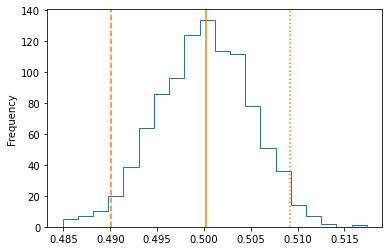

In [93]:
distDF = samplingdist(0.50,10000)

distDF['Orgeron'].plot(kind='hist', histtype='step',bins=20)
plt.axvline(distDF['Orgeron'].quantile(0.025), c='C1',linestyle='--')
plt.axvline(distDF['Orgeron'].quantile(0.500), c='C1')
plt.axvline(distDF['Orgeron'].quantile(0.975), c='C1',linestyle=':')

quantiles(0.5,10000)